# Mateusz Skowron MOwNiT
## Laboratorium 7
### Całkowanie

In [73]:
using Pkg
#Pkg.add("QuadGK")
using QuadGK
using Polynomials
using Plots
using DataFrames

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [6]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki
# x : [-1,1]
(xp, a) = gauss(Float64,7);

In [7]:
xp

7-element Vector{Float64}:
 -0.9491079123427585
 -0.7415311855993945
 -0.4058451513773972
  0.0
  0.4058451513773972
  0.7415311855993945
  0.9491079123427585

In [8]:
a

7-element Vector{Float64}:
 0.12948496616886981
 0.2797053914892767
 0.38183005050511887
 0.41795918367346907
 0.38183005050511887
 0.2797053914892767
 0.12948496616886981

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [10]:
# f(x) - funkcja
# xp - odcięte
# a - współczynniki
f(x) = x^2
# całka funkcji f(x) w przedziale [-1:1]
sum(a .* f.(xp)) 

0.6666666666666669

### Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [47]:
# Przeskalować P_k+1(x) = ... na P_k(x) = ...
function legendre_polynomials(n)
    if n == 0
        return Polynomial([1])
    end
    if n == 1
        return Polynomial([0,1])
    end
    m = zeros(Float64,n+1,n+1)
    m[1, 1] = 1
    m[2, 2] = 1
    
    for i in 3:n+1
        for j in 1:n
            m[i, j+1] += (2*i-3) / (i-1) * m[i-1,j]
            m[i,j] -= (i-2)/(i-1) * m[i-2,j]
        end
    end    
    coefs = [m[n+1,j] for j in 1:n+1]
    result = Polynomial(coefs)
    result
end

legendre_polynomials (generic function with 1 method)

Degree 0: 1
Degree 1: x
Degree 2: -0.5 + 1.5*x^2
Degree 3: -1.5*x + 2.5*x^3
Degree 4: 0.375 - 3.75*x^2 + 4.375*x^4
Degree 5: 1.875*x - 8.75*x^3 + 7.875*x^5


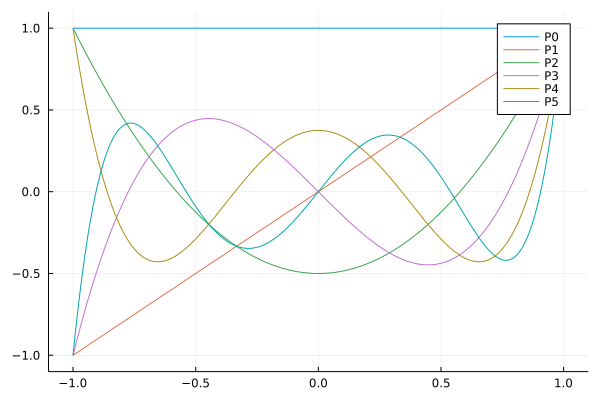

In [79]:
for i in 0:5
    println("Degree ",i,": ",legendre_polynomials(i))
end

range = -1:0.01:1

# 0
poly =  legendre_polynomials(0)
values = [poly(x) for x in  range]
plot(range, values, label="P0",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))
# 1
poly =  legendre_polynomials(1)
values = [poly(x) for x in  range]
plot!(range, values, label="P1",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))
# 2
poly =  legendre_polynomials(2)
values = [poly(x) for x in  range]
plot!(range, values, label="P2",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))
# 3
poly =  legendre_polynomials(3)
values = [poly(x) for x in  range]
plot!(range, values, label="P3",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))
# 4
poly =  legendre_polynomials(4)
values = [poly(x) for x in  range]
plot!(range, values, label="P4",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))
# 5
poly =  legendre_polynomials(5)
values = [poly(x) for x in  range]
plot!(range, values, label="P5",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))

#### Funkcja roots

In [77]:
for i in 2:4
    (xo, _) = gauss(Float64,i);
    poly =  legendre_polynomials(i)
    zeroes = roots(poly)
    println("Degree: ",i)
    println("Polynomial zeroes:  ",sort(zeroes))
    println("Abscissas of Gauss: ",sort(xo))
    println()
end

Degree: 2
Polynomial zeroes:  [-0.5773502691896258, 0.5773502691896256]
Abscissas of Gauss: [-0.5773502691896258, 0.5773502691896258]

Degree: 3
Polynomial zeroes:  [-0.7745966692414834, 0.0, 0.7745966692414835]
Abscissas of Gauss: [-0.7745966692414834, 0.0, 0.7745966692414834]

Degree: 4
Polynomial zeroes:  [-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
Abscissas of Gauss: [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]



#### Podstawowe twierdzenie kwadratur Gaussa
Odcięte  n-punktowej kwadratury Gaussa z funkcją ważącą w(x) w przedziale [a,b] są\
zerami wielomianu ortogonalnego fi(x) dla tego samego przedziału i tej samej funkcji ważącej.

### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

#### Funkcja

In [4]:
#gauss(k) returns a pair (x, w) of k quadrature points x[i] and weights w[i] to integrate functions on the interval (-1, 1)
function gaus_integral(f, k)
        x, w = gauss(k)
        return sum(w .* f.(x))
end    

gaus_integral (generic function with 1 method)

#### Test

In [46]:
degree = 3

println("Gauss Quadrature degree: ", degree)

println()
i = 0
for polynomial in [[if j != i 0 else 1 end for i in 1:j] for j in 1:10]
    p = Polynomial(polynomial)
    println("Polynomial:      ", p)
    my_func_res   = gaus_integral(p, degree)
    quadgk_result = quadgk(x -> (x^i), -1, 1)[1]
    println("gaus_integral(): ", my_func_res)
    println("Expected:        ", quadgk_result)
    println("Difference:      ",abs(quadgk_result - my_func_res))
    println()
    i += 1
end    

Gauss Quadrature degree: 3

Polynomial:      1
gaus_integral(): 1.9999999999999998
Expected:        2.0
Difference:      2.220446049250313e-16

Polynomial:      x
gaus_integral(): 0.0
Expected:        0.0
Difference:      0.0

Polynomial:      x^2
gaus_integral(): 0.6666666666666667
Expected:        0.6666666666666667
Difference:      0.0

Polynomial:      x^3
gaus_integral(): 0.0
Expected:        -1.856611517086701e-17
Difference:      1.856611517086701e-17

Polynomial:      x^4
gaus_integral(): 0.40000000000000013
Expected:        0.39999999999999997
Difference:      1.6653345369377348e-16

Polynomial:      x^5
gaus_integral(): 0.0
Expected:        0.0
Difference:      0.0

Polynomial:      x^6
gaus_integral(): 0.2400000000000001
Expected:        0.2857142857142857
Difference:      0.045714285714285596

Polynomial:      x^7
gaus_integral(): 0.0
Expected:        -2.388641112134727e-35
Difference:      2.388641112134727e-35

Polynomial:      x^8
gaus_integral(): 0.14400000000000007
Exp

#### Twierdzenie o stopniu dokładności kwadratury Gaussa

Kwadratura ma stopień dokładności 2n - 1 dla n punktowej kwadratury.

#### Wynik testu, a powyższe twierdzenie

Kwadratura jest stopnia 3. Zgodnie z twierdzeniem o stopniu dokładności kwadratury Gaussa (dokładny dla 2n-1) spodziewałem się dokładnych wyników dla wielomianów stopnia maksymalnie 5. Tak też wyszło na teście. Dla wielomianu stopnia 6 błąd wynosi 0.04, a więc jest spory.

### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [48]:
function gauss_integral(f, a, b, k)
    x, w = gauss(k) # points x[i] and weights w[i] of k quadrature on the interval (-1, 1)
    x = ((b - a) / 2) * x .+ ((b + a) / 2) # rescaling xs
    return ((b - a) / 2) * sum(f.(x) .* w) # result
end    

gauss_integral (generic function with 1 method)

#### 1. $f(x) = 5x^{5}$ w przedziale $[0,5]$

In [56]:
println("Expected result:             ", 13021)
println()
for i in 1:5
    println("Quadrature degree: ",i ," result: ", gauss_integral(x -> 5*x^5, 0, 5, i))
end

Expected result:             13021

Quadrature degree: 1 result: 2441.40625
Quadrature degree: 2 result: 11935.763888888889
Quadrature degree: 3 result: 13020.833333333328
Quadrature degree: 4 result: 13020.833333333341
Quadrature degree: 5 result: 13020.833333333336


#### 2. $f(x) = tg(x)$ w przedziale $[0,1]$

In [63]:
println("Expected result:             ", 0.61563)
println()
for i in 1:5
    println("Quadrature degree: ",i ," result: ", gauss_integral(tan, 0, 1, i))
end

Expected result:             0.61563

Quadrature degree: 1 result: 0.5463024898437905
Quadrature degree: 2 result: 0.6105517018842489
Quadrature degree: 3 result: 0.6152965903919287
Quadrature degree: 4 result: 0.6156057211450722
Quadrature degree: 5 result: 0.6156251795896692


#### 3. $f(x) = e^{x}$ w przedziale $[0,1]$

In [66]:
println("Expected result:             ", 1.7183)
println()
for i in 1:5
    println("Quadrature degree: ",i ," result: ", gauss_integral(x -> exp(x), 0, 1, i))
end

Expected result:             1.7183

Quadrature degree: 1 result: 1.6487212707001282
Quadrature degree: 2 result: 1.7178963780075036
Quadrature degree: 3 result: 1.7182810043725216
Quadrature degree: 4 result: 1.7182818275260778
Quadrature degree: 5 result: 1.7182818284583912


### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

#### Example polynomial

In [70]:
polynomial = Polynomial([5,7,8,5,7,8,5,7,8])
v, e = quadgk(polynomial, -1, 1)
println(polynomial)
println("Value: ",v)
println("Error: ", e)

5 + 7*x + 8*x^2 + 5*x^3 + 7*x^4 + 8*x^5 + 5*x^6 + 7*x^7 + 8*x^8
Value: 21.339682539682535
Error: 3.552713678800501e-15


#### $ f(x) = \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$   in range $(-\infty,\infty)$

In [71]:
v, e = quadgk(x -> 1/sqrt(2*pi) * exp(-x^2 / 2), -Inf,Inf)
println("Value: ",v)
println("Error: ", e)

Value: 1.0000000000032583
Error: 1.4395584885993386e-8


### Zadanie 5 (3p)
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)


#### Midpoint Rule

In [250]:
function midpoint_rule(f, a, b, k) 
    h = (b-a)/k
    result = 0.0
    for i = 1:k
        xk_mid = (b-a) * (2i-1)/(2k) + a
        result += h*f(xk_mid)
    end
    return result
end

midpoint_rule (generic function with 1 method)

In [251]:
data_frame = DataFrame(k = Int64[], func = String[], error = Float64[])

,k,func,error
,Int64,String,Float64


In [252]:
for i=1:1:10
    push!(data_frame, [i "exp" abs( midpoint_rule(exp, 0, 1, i) - (exp(1)-exp(0)))])
    push!(data_frame, [i "sin" abs( midpoint_rule(sin, 0, 2*pi, i) - (-cos(2*pi)+cos(0)))])
end

In [253]:
data_frame

,k,func,error
,Int64,String,Float64
1,1,exp,0.0695606
2,1,sin,7.69468e-16
3,2,exp,0.0177691
4,2,sin,0.0
5,3,exp,0.0079293
6,3,sin,2.22045e-16
7,4,exp,0.00446655
8,4,sin,2.22045e-16
9,5,exp,0.00286047


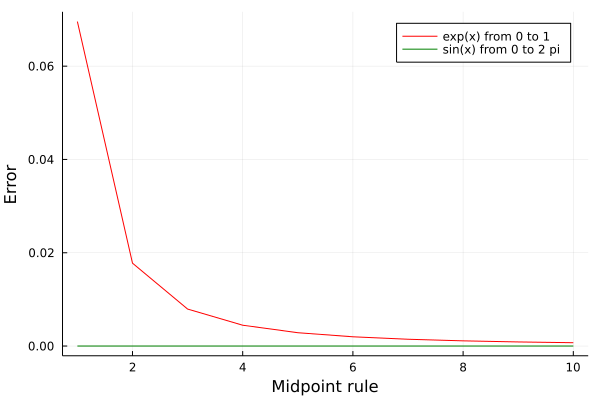

In [254]:
plot([ data_frame[data_frame[:,2] .== "exp", :].k data_frame[data_frame[:,2] .== "sin", :].k],
    [ data_frame[data_frame[:,2] .== "exp", :].error  data_frame[data_frame[:,2] .== "sin", :].error],
    colour = [:red :green],
    label = [ "exp(x) from 0 to 1" "sin(x) from 0 to 2 pi"],
    xlab = "Midpoint rule",
    ylab = "Error"
)

#### Trapezoidal rule

In [255]:
function trapezoidal_rule(f, a, b, k) 
    h = (b-a)/k
    result = h * ( f(a) + f(b) ) / 2
    for i= 1:k-1
        xi = (b-a) * i/k + a
        result += h*f(xi)
    end
    return result
end

trapezoidal_rule (generic function with 1 method)

In [256]:
data_frame = DataFrame(k = Int64[], func = String[], error = Float64[])

,k,func,error
,Int64,String,Float64


In [257]:
for i=1:1:10
    push!(data_frame, [i "exp" abs( trapezoidal_rule(exp, 0, 1, i) - (exp(1)-exp(0)))])
    push!(data_frame, [i "sin" abs( trapezoidal_rule(sin, 0, 2*pi, i) - (-cos(2*pi)+cos(0)))])
end

In [258]:
data_frame

,k,func,error
,Int64,String,Float64
1,1,exp,0.140859
2,1,sin,7.69468e-16
3,2,exp,0.0356493
4,2,sin,0.0
5,3,exp,0.0158806
6,3,sin,2.22045e-16
7,4,exp,0.00894008
8,4,sin,0.0
9,5,exp,0.00572379


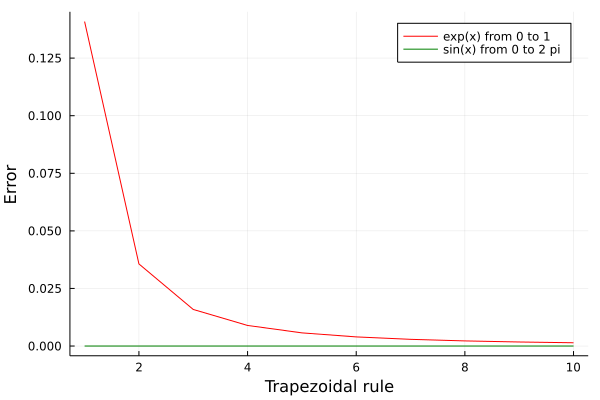

In [259]:
plot([ data_frame[data_frame[:,2] .== "exp", :].k data_frame[data_frame[:,2] .== "sin", :].k],
    [ data_frame[data_frame[:,2] .== "exp", :].error  data_frame[data_frame[:,2] .== "sin", :].error],
    colour = [:red :green],
    label = [ "exp(x) from 0 to 1" "sin(x) from 0 to 2 pi"],
    xlab = "Trapezoidal rule",
    ylab = "Error"
)

#### Simpson's rule

In [260]:
function simpson_rule(f, a, b, k)
    h = (b - a) / k
    xi0 = f(a) + f(b)
    xi1 = 0
    xi2 = 0
    
    for i in 1:k-1
        x = a + i*h
        if(i % 2 == 0)
            xi2 += f(x)
        else
            xi1 += f(x)
        end
    end
    
    xi = h*(xi0 + 2*xi2 + 4*xi1)/3
    
    return xi
end

simpson_rule (generic function with 1 method)

In [261]:
data_frame = DataFrame(k = Int64[], func = String[], error = Float64[])

,k,func,error
,Int64,String,Float64


In [262]:
for i=2:2:20
    push!(data_frame, [i "exp" abs( simpson_rule(exp, 0, 1, i) - (exp(1)-exp(0)))])
    push!(data_frame, [i "sin" abs( simpson_rule(sin, 0, 2*pi, i) - (-cos(2*pi)+cos(0)))])
end

In [263]:
data_frame

,k,func,error
,Int64,String,Float64
1,2,exp,0.000579323
2,2,sin,2.56489e-16
3,4,exp,3.70135e-5
4,4,sin,0.0
5,6,exp,7.34146e-6
6,6,sin,3.95529e-16
7,8,exp,2.32624e-6
8,8,sin,1.80385e-16
9,10,exp,9.53466e-7


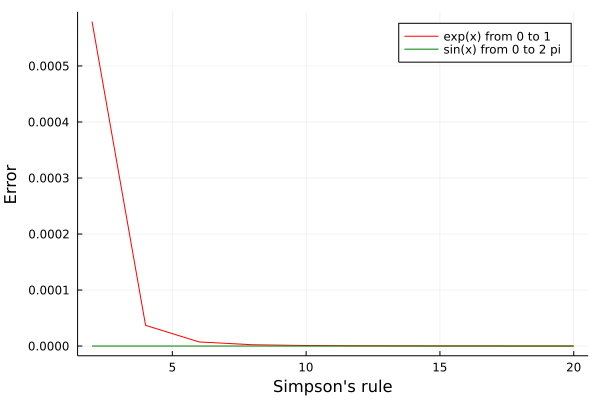

In [264]:
plot([ data_frame[data_frame[:,2] .== "exp", :].k data_frame[data_frame[:,2] .== "sin", :].k],
    [ data_frame[data_frame[:,2] .== "exp", :].error  data_frame[data_frame[:,2] .== "sin", :].error],
    colour = [:red :green],
    label = [ "exp(x) from 0 to 1" "sin(x) from 0 to 2 pi"],
    xlab = "Simpson's rule",
    ylab = "Error"
)